In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC


# Import dataset
df = sns.load_dataset('car_crashes')
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [102]:
# check one column data
df.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


<Axes: xlabel='ins_premium', ylabel='Density'>

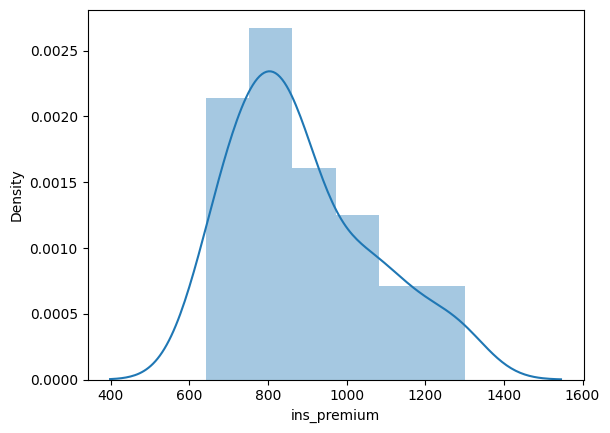

In [103]:
# check outliears in total column
sns.distplot(df['ins_premium'])


In [104]:
# extract x and y in our data set
X = df.drop(columns=['abbrev','ins_losses'],axis=1)
y = df['abbrev']

In [105]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
X = qt.fit_transform(X)
# Convert Back X into Dataframe 
X = pd.DataFrame(X , columns=['total','speeding','alcohol','not_distracted','no_previous','ins_premium'])

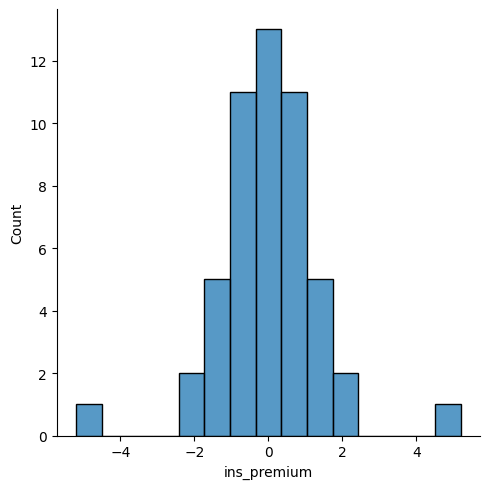

In [106]:
sns.displot(X['ins_premium'])

In [107]:
# Train Test split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
svc = SVC(kernel='linear')

In [109]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [110]:
y_pred = svc.predict(X_test)

In [111]:
# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support


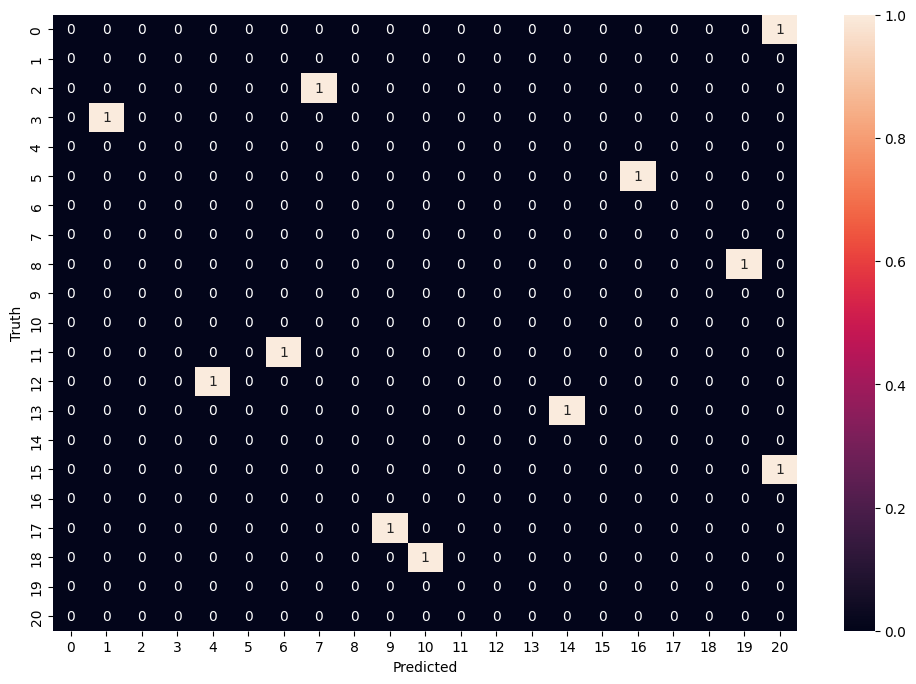

In [112]:
# draw the confusion matrix using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
# label the plot
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

---

# Clusttering Method 

In [3]:
df = sns.load_dataset('car_crashes')

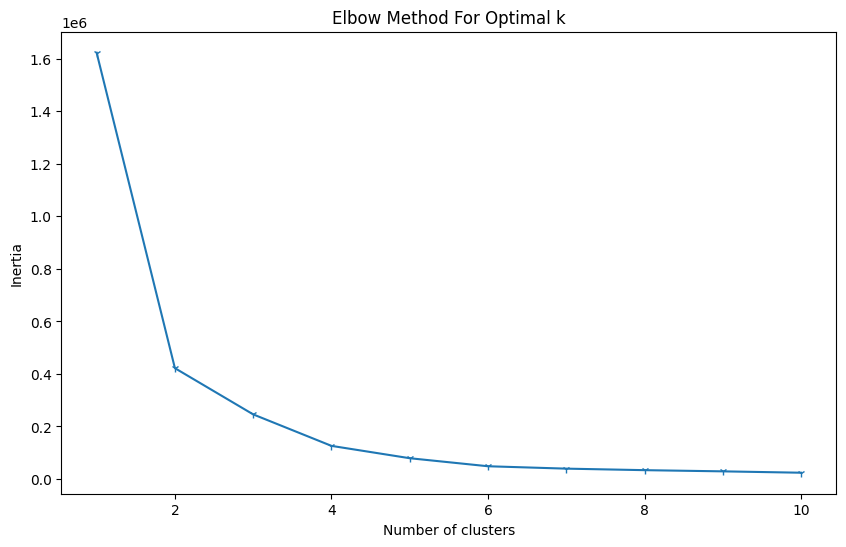

In [5]:
from sklearn.cluster import KMeans

# Since there is no explicit target variable, we can use a clustering algorithm to create clusters and use them as labels.
# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df.drop('abbrev', axis=1))
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='1')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [6]:
# Choose an appropriate number of clusters and apply KMeans
# From the Elbow plot, let's choose 3 clusters for this example
kmeans = KMeans(n_clusters=3, random_state=0).fit(df.drop('abbrev', axis=1))

# Create a new column in the dataframe with the assigned cluster labels
# These labels will serve as our target variable for the SVC model
df['cluster'] = kmeans.labels_

# Display the first few rows of the dataframe with the new cluster labels
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,cluster
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,2
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,1
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,0
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,0
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Define the feature variables and the target variable
X = df.drop(['abbrev', 'cluster'], axis=1)
y = df['cluster']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVC model
svc = SVC(kernel='linear')
svc.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svc.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the accuracy and classification report
print('Accuracy:', accuracy)
print('Classification Report:\n', class_report)

Accuracy: 0.8181818181818182
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       1.00      1.00      1.00         3
           2       0.75      0.75      0.75         4

    accuracy                           0.82        11
   macro avg       0.83      0.83      0.83        11
weighted avg       0.82      0.82      0.82        11



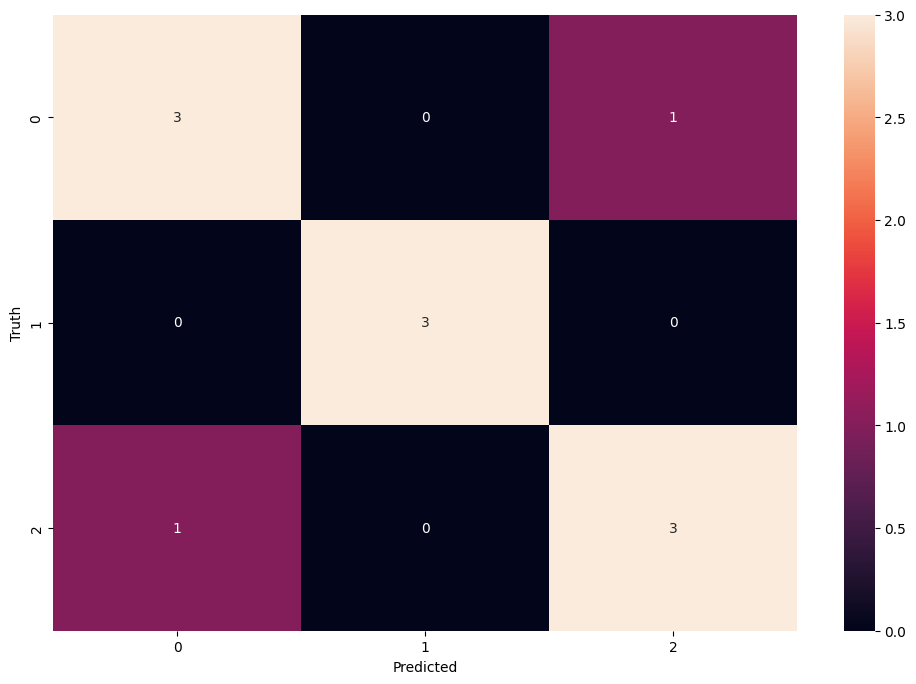

In [8]:
# Draw the confusion matrix using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
# Label the plot
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()